In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading Data

In [198]:
data = pd.read_csv('Dataset\FuelConsumption.csv')

In [199]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [200]:
df = data.copy()

## Exploratory Data Analysis & Preprocessing

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [202]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [203]:
df.MODELYEAR.value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [204]:
df.drop(columns=['MODELYEAR'], inplace=True)

In [205]:
df.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [206]:
df.select_dtypes('object').columns

Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')

In [207]:
cat_cols = df.select_dtypes('object').columns

In [208]:
for col in cat_cols:
    counts = df[col].value_counts()
    print(counts)
    print('===================')

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64
F150 FFV                 8
F150 FFV 4X4             8
ACCORD                   6
FOCUS FFV                6
BEETLE                   6
                        ..
Q50 AWD                  1
Q50   

In [209]:
df.drop(columns=cat_cols, inplace=True)

In [210]:
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


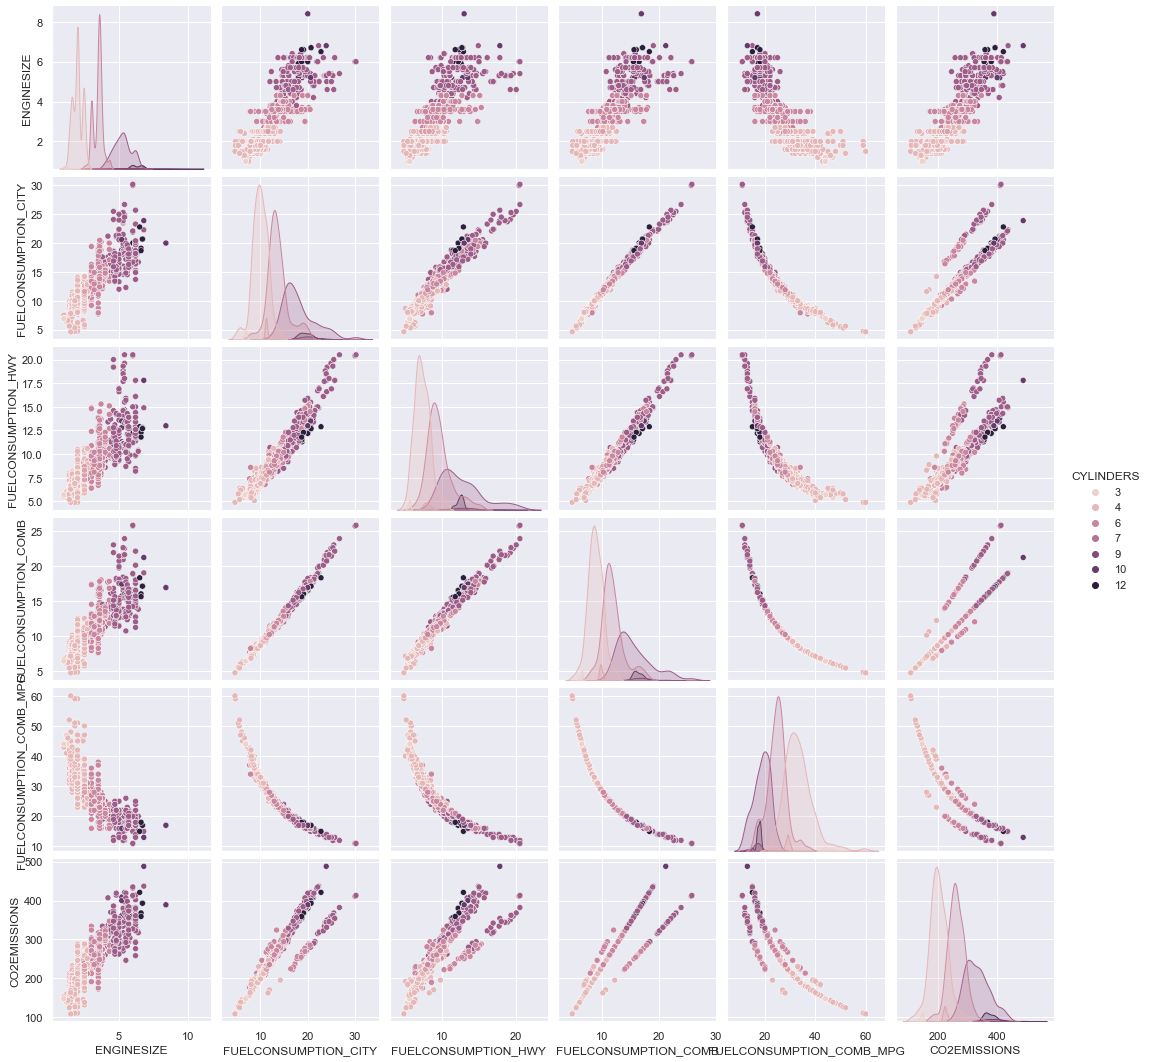

In [211]:
# paiplot create a grid of Axes such that each numeric variable in data will by shared across y-axes across a single row and
# x-axes across a single column, hue is name of variable in data to map plot aspects to different colors
sns.pairplot(df, hue='CYLINDERS')

In [212]:
df.corr()[['CO2EMISSIONS']].sort_values(by=['CO2EMISSIONS'], ascending=False)

,CO2EMISSIONS
CO2EMISSIONS,1.000000
FUELCONSUMPTION_CITY,0.898039
FUELCONSUMPTION_COMB,0.892129
ENGINESIZE,0.874154
FUELCONSUMPTION_HWY,0.861748
CYLINDERS,0.849685
FUELCONSUMPTION_COMB_MPG,-0.906394


<AxesSubplot: >

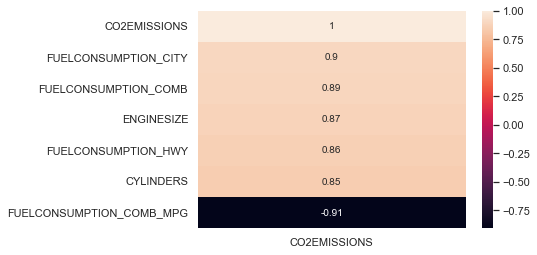

In [213]:
sns.heatmap(df.corr()[['CO2EMISSIONS']].sort_values(by=['CO2EMISSIONS'], ascending=False),annot=True) # annot will show value

## Outlier Detection and Removal

<AxesSubplot: >

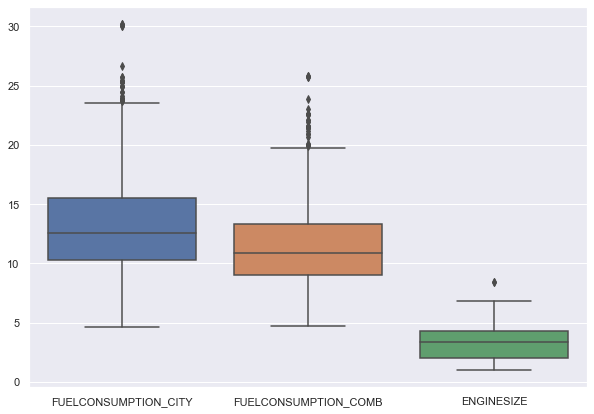

In [44]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.boxplot(data=df[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'ENGINESIZE']])

<AxesSubplot: >

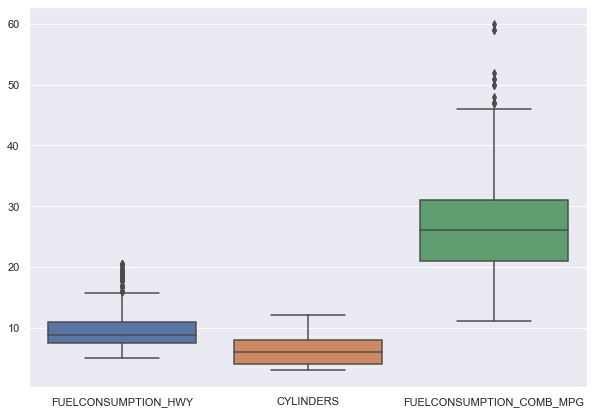

In [45]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df[['FUELCONSUMPTION_HWY', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']])

Outlier detection and removal using IQR with np gives index error, so better to avoid np\
df1 = df.copy()\
df1.shape\
df1.ENGINESIZE.describe()\
q1, q3 = np.quantile(df1.ENGINESIZE, .25), np.quantile(df1.ENGINESIZE, .75)\
q1, q3\
iqr = q3 - q1\
iqr\
low_out = np.where(df1.ENGINESIZE < q1 - (1.5*iqr))[0]\
low_out\
up_out = np.where(df1.ENGINESIZE > q3 + (1.5*iqr))[0]\
up_out\
df1.drop(low_out, inplace=True)\
df1.drop(up_out, inplace=True)\
q1, q3 = np.quantile(df1.FUELCONSUMPTION_CITY, .25), np.quantile(df1.FUELCONSUMPTION_CITY, .75)\
iqr = q3 - q1\
low_out = np.where(df1.FUELCONSUMPTION_CITY < q1 - (1.5*iqr))[0]\
up_out = np.where(df1.FUELCONSUMPTION_CITY > q3 + (1.5*iqr))[0]\
print(low_out)\
print(up_out)\
print(len(low_out))\
print(len(up_out))

###### Outlier detection and removal using IQR with pd gives no index error, so better to use pd
Q1 = df8.height.quantile(0.25)\
Q3 = df8.height.quantile(0.75)\
IQR = Q3 - Q1\
lower_limit = Q1 - 1.5*IQR\
upper_limit = Q3 + 1.5*IQR\
lower_limit, upper_limit\
FUELCONSUMPTION_CITY\
ENGINESIZE\
FUELCONSUMPTION_COMB\
FUELCONSUMPTION_HWY\
CYLINDERS\
FUELCONSUMPTION_COMB_MPG

In [89]:
df2 = df.copy()
df2.shape

(1067, 7)

In [186]:
Q1 = df2.FUELCONSUMPTION_COMB_MPG.quantile(0.25)
Q3 = df2.FUELCONSUMPTION_COMB_MPG.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(8.5, 44.5)

In [187]:
df2[(df2.FUELCONSUMPTION_COMB_MPG<lower_limit)|(df2.FUELCONSUMPTION_COMB_MPG>upper_limit)].shape

(0, 7)

In [188]:
df2 = df2[(df2.FUELCONSUMPTION_COMB_MPG>lower_limit)&(df2.FUELCONSUMPTION_COMB_MPG<upper_limit)]
df2.shape

(971, 7)

<AxesSubplot: >

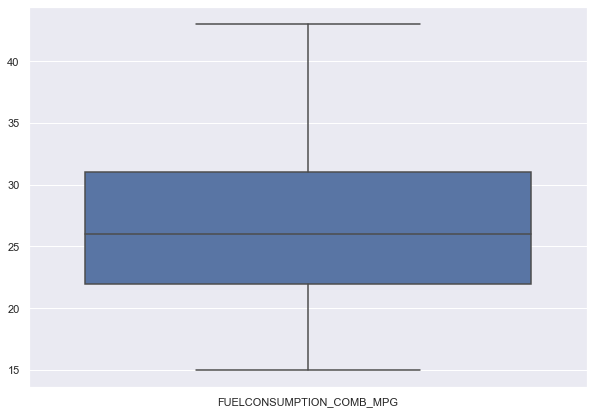

In [185]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.boxplot(data=df2[['FUELCONSUMPTION_COMB_MPG']])

<AxesSubplot: >

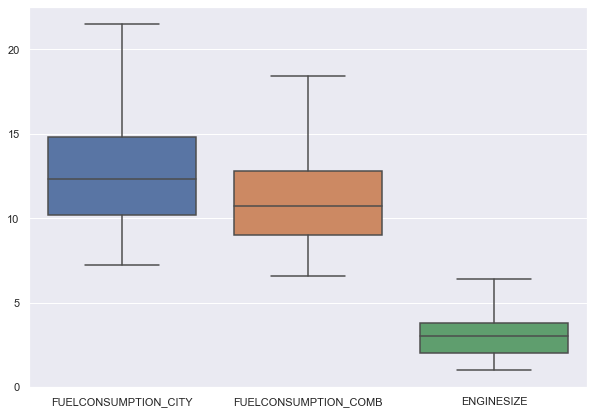

In [189]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.boxplot(data=df2[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'ENGINESIZE']])

<AxesSubplot: >

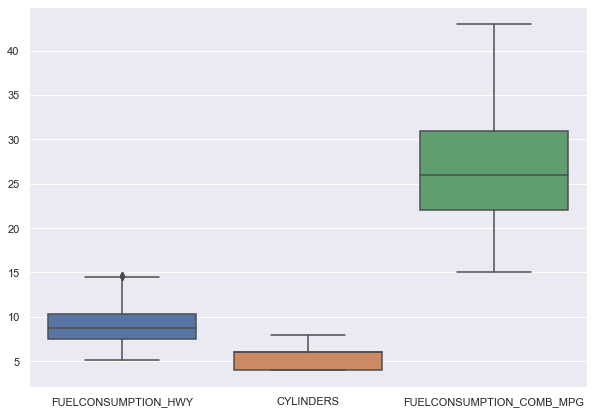

In [190]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2[['FUELCONSUMPTION_HWY', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']])

### Outlier Detection and Removal using function

In [400]:
class OutlierTreatment:
    def __init__(self, DataFrame):
        self.DataFrame = DataFrame
        
    def getInfo(self):
        return (self.DataFrame.head())
    
    def outlier(self):
        q1, q3 = np.quantile(self.DataFrame, .25), np.quantile(self.DataFrame, .75)
        iqr = q3 - q1
        low_out = np.where(self.DataFrame < q1 - (1.5*iqr))[0]
        up_out  = np.where(self.DataFrame > q3 + (1.5*iqr))[0]
        return low_out,up_out
        
    def countoutlier(self):
        a,b=self.outlier()
        return f'lower outlier is {len(a)} and upper outlier is {len(b)}'       
            
    def cleanoutlier(DataFrame):
        a,b=self.outlier()
        if (len(a)>5 or len(b)>5):
            DataFrame.drop(a, inplace=True)
            DataFrame.drop(b, inplace=True)
            return DataFrame.info()
        else:
            return f'not too much'

In [406]:
d = OutlierTreatment(df1[['CYLINDERS']])
d.outlier()

(array([], dtype=int64),
 array([ 12,  13,  18,  35,  46,  47,  50,  51,  69,  71,  73,  74, 112,
        609, 610, 611, 894, 895, 896, 897, 898, 899, 900], dtype=int64))

In [403]:
d = OutlierTreatment(df1[['FUELCONSUMPTION_COMB_MPG']])
d.outlier()

(array([], dtype=int64),
 array([   2,  333,  400,  463,  470,  491,  492,  628,  629,  658,  796,
         903,  940,  941,  957,  958,  959, 1012], dtype=int64))

In [ ]:
d.cleanoutlier(df1)

In [394]:
d = OutlierTreatment(df1[['FUELCONSUMPTION_CITY']])
d.outlier()
d.cleanoutlier(df1)

'not too much'

In [397]:
#d = OutlierTreatment(df1[['FUELCONSUMPTION_COMB_MPG']])
d.countoutlier()

'lower outlier is 0 and upper outlier is 18'

In [398]:
d.outlier()

(array([], dtype=int64),
 array([   2,  333,  400,  463,  470,  491,  492,  628,  629,  658,  796,
         903,  940,  941,  957,  958,  959, 1012], dtype=int64))

In [402]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 0 to 1066
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENGINESIZE                1037 non-null   float64
 1   CYLINDERS                 1037 non-null   int64  
 2   FUELCONSUMPTION_CITY      1037 non-null   float64
 3   FUELCONSUMPTION_HWY       1037 non-null   float64
 4   FUELCONSUMPTION_COMB      1037 non-null   float64
 5   FUELCONSUMPTION_COMB_MPG  1037 non-null   int64  
 6   CO2EMISSIONS              1037 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 97.1 KB


In [281]:
d = OutlierTreatment(df1[['FUELCONSUMPTION_CITY']])
d.outlier()

(array([], dtype=int64),
 array([182, 212, 214, 216, 218, 220, 222, 225, 228, 344, 346, 348, 349,
        351, 362, 436, 438, 440, 442, 444, 446, 449, 452, 476, 642, 648,
        654, 687], dtype=int64))

In [282]:
d.countoutlier()

'lower outlier is 0 and upper outlier is 28'

In [283]:
d.cleanoutlier(df1)

(array([], dtype=int64),
 array([182, 212, 214, 216, 218, 220, 222, 225, 228, 344, 346, 348, 349,
        351, 362, 436, 438, 440, 442, 444, 446, 449, 452, 476, 642, 648,
        654, 687], dtype=int64))

In [203]:
d = OutlierTreatment(df1[['FUELCONSUMPTION_HWY']])
d.countoutlier()

'lower outlier is 0 and upper outlier is 37'

In [204]:
d = OutlierTreatment(df1[['FUELCONSUMPTION_COMB']])
d.countoutlier()

'lower outlier is 0 and upper outlier is 32'

In [205]:
d = OutlierTreatment(df1[['FUELCONSUMPTION_COMB_MPG']])
d.countoutlier()

'lower outlier is 0 and upper outlier is 13'

## Feature Engineering and Selection

In [214]:
df2.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [228]:
# Dataset Split
# random_state keeps same train and test data sets across each executions of this cell
xtrain, xtest, ytrain , ytest = train_test_split(
    df2.drop(columns=['CO2EMISSIONS']), df2[['CO2EMISSIONS']], test_size=0.2, random_state=33)

In [233]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(776, 6)
(776, 1)
(195, 6)
(195, 1)


#### Feature Selection

In [280]:
# Mutual information is a quantity that measures a relationship between two random variables that are sampled simultaneously
# MI(Mutual information) score fall in range from 0 to ∞, higher value indicates closer connection between feature and target
# which suggests to put that feature in training dataset
# ytrain is a dataframe, ytrain.values.reshape(-1,) changes into 1d array
scores = mutual_info_regression(xtrain, ytrain.values.reshape(-1,), random_state=33)
scores = pd.DataFrame(scores)
scores.index = xtrain.columns
scores.sort_values(by=0, ascending=False)

,0
FUELCONSUMPTION_COMB,4.096060
FUELCONSUMPTION_COMB_MPG,2.885954
FUELCONSUMPTION_CITY,2.126939
FUELCONSUMPTION_HWY,1.558267
ENGINESIZE,0.957158
CYLINDERS,0.665090


test code to understand changing dataframe into 1d array\
ytrain.values.reshape(-1,1) and ytrain.values gives same output\
ytrain.values.reshape(-1,) turns every value into one row\
ytrain.values.reshape(-1,).shape\
type(ytrain.values.reshape(-1,))

###  Simple Linear Regression Modeling

In [286]:
# from Mutual information, FUELCONSUMPTION_COMB is better feature to build model as it has higher MI score than others
model = LinearRegression()
model.fit(xtrain[['FUELCONSUMPTION_COMB']], ytrain)

LinearRegression()

In [289]:
model.coef_

array([[18.2747311]])

In [290]:
model.intercept_

array([46.99343995])

In [293]:
# predicting on training set
model.predict(xtrain[['FUELCONSUMPTION_COMB']])

array([[280.90999798],
       [333.90671816],
       [215.12096603],
       [269.94515932],
       [189.5363425 ],
       [269.94515932],
       [293.70230975],
       [211.46601981],
       [231.56822402],
       [224.25833158],
       [246.1880089 ],
       [313.80451395],
       [209.6385467 ],
       [187.70886939],
       [269.94515932],
       [257.15284755],
       [348.52650304],
       [185.88139628],
       [200.50118115],
       [200.50118115],
       [279.08252487],
       [280.90999798],
       [293.70230975],
       [226.08580469],
       [237.05064335],
       [268.11768621],
       [246.1880089 ],
       [211.46601981],
       [198.67370804],
       [317.45946017],
       [198.67370804],
       [231.56822402],
       [304.6671484 ],
       [229.74075091],
       [271.77263243],
       [218.77591225],
       [264.46273999],
       [202.32865426],
       [280.90999798],
       [226.08580469],
       [196.84623494],
       [207.81107359],
       [293.70230975],
       [240

In [294]:
ytrain

,CO2EMISSIONS
184,294
427,251
9,212
551,281
197,179
...,...
732,304
644,285
804,191
437,380


### Model Evaluation

In [295]:
# Model Evaluation on both train and test set based on Model Evaluation
ypred_train = model.predict(xtrain[['FUELCONSUMPTION_COMB']])
ypred_test = model.predict(xtest[['FUELCONSUMPTION_COMB']])

Mean Absolute Error is called (MAE) and Root Mean Squared Error is called (RMSE)\
Both MAE and RMSE can range from 0 to ∞, They are negatively-oriented scores: Lower values are better\
closer r-squared value is to 1, better is fit\
An r-squared value of 0 indicates that regression line does not fit data at all while value of 1 indicates a perfect fit

In [306]:
print("mean_absolute_error on train set: ",mean_absolute_error(y_true=ytrain, y_pred=ypred_train))
print("mean_absolute_error on test set: ",mean_absolute_error(y_true=ytest, y_pred=ypred_test))

print("mean_squared_error on train set: ",mean_squared_error(y_true=ytrain, y_pred=ypred_train))
print("mean_squared_error on test set: ",mean_squared_error(y_true=ytest, y_pred=ypred_test))

print("r2_score on train set: ",r2_score(y_true=ytrain, y_pred=ypred_train))
print("r2_score on test set: ",r2_score(y_true=ytest, y_pred=ypred_test))

mean_absolute_error on train set:  14.13128844709596
mean_absolute_error on test set:  13.992888773644369
mean_squared_error on train set:  549.0877021188538
mean_squared_error on test set:  517.8962985957421
r2_score on train set:  0.8145374046582365
r2_score on test set:  0.8268298410878057


#### Model Visualization

In [308]:
xtrain[['FUELCONSUMPTION_COMB']].describe().T

,count,mean,std,min,25%,50%,75%,max
FUELCONSUMPTION_COMB,776.0,11.055284,2.688916,6.6,8.9,10.65,12.7,18.4


In [351]:
# np.linspace generates linearly spaced values, here generating 200 spaced values between min amd max value
# creating dummy_x numpy.ndarray with sample data created with linspace    
dummy_x = np.linspace(6.6, 19, 200) 
dummy_x = dummy_x.reshape(-1, 1)
#dummy_x.shape
dummy_x

array([[ 6.6       ],
       [ 6.66231156],
       [ 6.72462312],
       [ 6.78693467],
       [ 6.84924623],
       [ 6.91155779],
       [ 6.97386935],
       [ 7.0361809 ],
       [ 7.09849246],
       [ 7.16080402],
       [ 7.22311558],
       [ 7.28542714],
       [ 7.34773869],
       [ 7.41005025],
       [ 7.47236181],
       [ 7.53467337],
       [ 7.59698492],
       [ 7.65929648],
       [ 7.72160804],
       [ 7.7839196 ],
       [ 7.84623116],
       [ 7.90854271],
       [ 7.97085427],
       [ 8.03316583],
       [ 8.09547739],
       [ 8.15778894],
       [ 8.2201005 ],
       [ 8.28241206],
       [ 8.34472362],
       [ 8.40703518],
       [ 8.46934673],
       [ 8.53165829],
       [ 8.59396985],
       [ 8.65628141],
       [ 8.71859296],
       [ 8.78090452],
       [ 8.84321608],
       [ 8.90552764],
       [ 8.9678392 ],
       [ 9.03015075],
       [ 9.09246231],
       [ 9.15477387],
       [ 9.21708543],
       [ 9.27939698],
       [ 9.34170854],
       [ 9

In [353]:
# converting dummy_x numpy.ndarray to dataframe with columnname same as model columnname which is FUELCONSUMPTION_COMB
# any columnname other than FUELCONSUMPTION_COMB will raise warning for valid feature names that model were fitted
dftest = pd.DataFrame(dummy_x,columns=['FUELCONSUMPTION_COMB'])
dftest

,FUELCONSUMPTION_COMB
0,6.600000
1,6.662312
2,6.724623
3,6.786935
4,6.849246
...,...
195,18.750754
196,18.813065
197,18.875377
198,18.937688


In [361]:
# model.predict(dftest) and model.predict(dftest[['FUELCONSUMPTION_COMB']]) are same
ypred = model.predict(dftest)
ypred.shape

(200, 1)

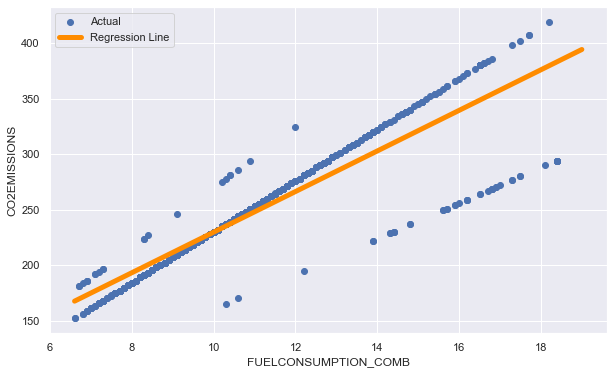

In [370]:
plt.figure(figsize=(10,6))
plt.scatter(xtrain[['FUELCONSUMPTION_COMB']], ytrain, label='Actual')
plt.plot(dummy_x, ypred, label='Regression Line', color='darkorange', linewidth=5) # line plot
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

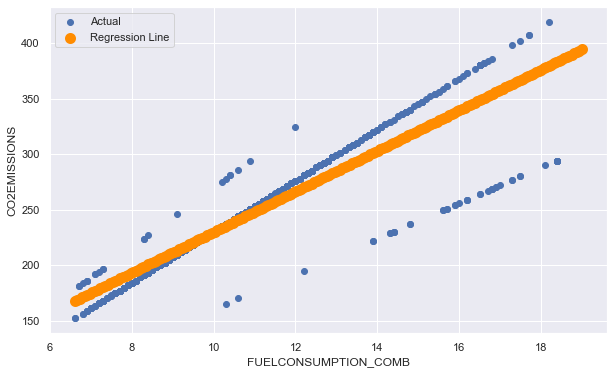

In [371]:
plt.figure(figsize=(10,6))
plt.scatter(xtrain[['FUELCONSUMPTION_COMB']], ytrain, label='Actual')
plt.scatter(dummy_x, ypred, label='Regression Line', color='darkorange', linewidth=5)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

##### Model with ENGINESIZE

In [372]:
model = LinearRegression()
model.fit(xtrain[['ENGINESIZE']], ytrain)
print(model.coef_)
print(model.intercept_)
# Model Evaluation on both train and test set based on Model Evaluation
ypred_train = model.predict(xtrain[['ENGINESIZE']])
ypred_test = model.predict(xtest[['ENGINESIZE']])

[[36.32293221]]
[133.56940129]


In [373]:
# Model Evaluation
print("mean_absolute_error on train set: ",mean_absolute_error(y_true=ytrain, y_pred=ypred_train))
print("mean_absolute_error on test set: ",mean_absolute_error(y_true=ytest, y_pred=ypred_test))

print("mean_squared_error on train set: ",mean_squared_error(y_true=ytrain, y_pred=ypred_train))
print("mean_squared_error on test set: ",mean_squared_error(y_true=ytest, y_pred=ypred_test))

print("r2_score on train set: ",r2_score(y_true=ytrain, y_pred=ypred_train))
print("r2_score on test set: ",r2_score(y_true=ytest, y_pred=ypred_test))

mean_absolute_error on train set:  21.66353592616231
mean_absolute_error on test set:  21.71722645600641
mean_squared_error on train set:  800.1857101424038
mean_squared_error on test set:  833.6778286307704
r2_score on train set:  0.729725291632412
r2_score on test set:  0.7212412553304344


In [375]:
# Model Visualization
xtrain[['ENGINESIZE']].describe().T

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,776.0,3.178608,1.280476,1.0,2.0,3.0,3.725,6.4


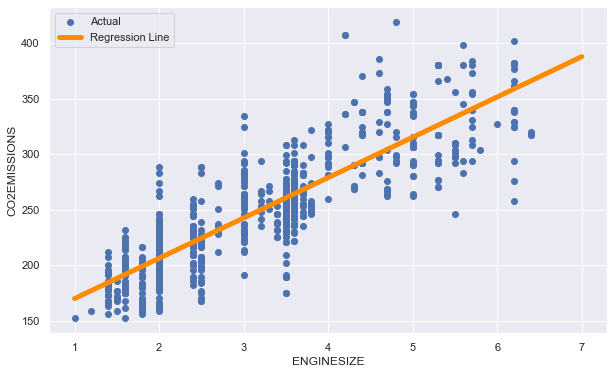

In [376]:
dummy_x = np.linspace(1, 7, 200) 
dummy_x = dummy_x.reshape(-1, 1)
dftest = pd.DataFrame(dummy_x,columns=['ENGINESIZE'])
ypred = model.predict(dftest)
plt.figure(figsize=(10,6))
plt.scatter(xtrain[['ENGINESIZE']], ytrain, label='Actual')
plt.plot(dummy_x, ypred, label='Regression Line', color='darkorange', linewidth=5) # line plot
plt.xlabel("ENGINESIZE")
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

##### Model with CYLINDERS

In [377]:
model = LinearRegression()
model.fit(xtrain[['CYLINDERS']], ytrain)
print(model.coef_)
print(model.intercept_)
# Model Evaluation on both train and test set based on Model Evaluation
ypred_train = model.predict(xtrain[['CYLINDERS']])
ypred_test = model.predict(xtest[['CYLINDERS']])

[[29.70077652]]
[83.79606669]


In [378]:
# Model Evaluation
print("mean_absolute_error on train set: ",mean_absolute_error(y_true=ytrain, y_pred=ypred_train))
print("mean_absolute_error on test set: ",mean_absolute_error(y_true=ytest, y_pred=ypred_test))

print("mean_squared_error on train set: ",mean_squared_error(y_true=ytrain, y_pred=ypred_train))
print("mean_squared_error on test set: ",mean_squared_error(y_true=ytest, y_pred=ypred_test))

print("r2_score on train set: ",r2_score(y_true=ytrain, y_pred=ypred_train))
print("r2_score on test set: ",r2_score(y_true=ytest, y_pred=ypred_test))

mean_absolute_error on train set:  23.126980276308515
mean_absolute_error on test set:  23.493413059075053
mean_squared_error on train set:  865.6721504803787
mean_squared_error on test set:  879.4082164674542
r2_score on train set:  0.707606265586286
r2_score on test set:  0.7059502819246246


In [379]:
# Model Visualization
xtrain[['CYLINDERS']].describe().T

,count,mean,std,min,25%,50%,75%,max
CYLINDERS,776.0,5.563144,1.542058,4.0,4.0,6.0,6.0,8.0


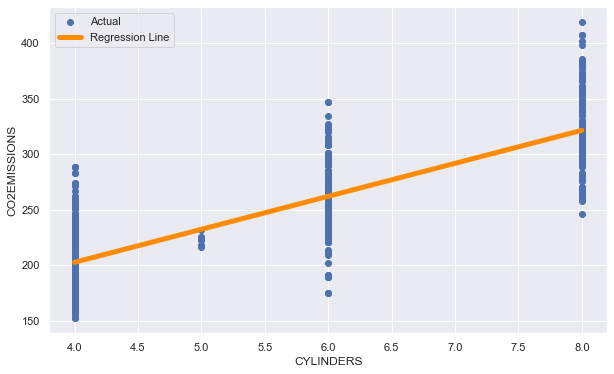

In [380]:
dummy_x = np.linspace(4, 8, 200) 
dummy_x = dummy_x.reshape(-1, 1)
dftest = pd.DataFrame(dummy_x,columns=['CYLINDERS'])
ypred = model.predict(dftest)
plt.figure(figsize=(10,6))
plt.scatter(xtrain[['CYLINDERS']], ytrain, label='Actual')
plt.plot(dummy_x, ypred, label='Regression Line', color='darkorange', linewidth=5) # line plot
plt.xlabel("CYLINDERS")
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()